In [1]:
print("Hello world!")

Hello world!


In [2]:
import pandas as pd
import seaborn as sns


In [3]:
!pwd
!cd raw_data/

/Users/jingxuanzhu/code/apasti/shopping_for_players/jupyter_notebooks
zsh:cd:1: no such file or directory: raw_data/


In [4]:
appearances = pd.read_csv("shopping_for_players/raw_data/appearances.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'shopping_for_players/raw_data/appearances.csv'

In [5]:
appearances = pd.read_csv("shopping_for_players/raw_data/appearances.csv")
club_games = pd.read_csv("shopping_for_players/raw_data/club_games.csv")
clubs = pd.read_csv("shopping_for_players/raw_data/clubs.csv")
competitions = pd.read_csv("shopping_for_players/raw_data/competitions.csv")
club_games = pd.read_csv("shopping_for_players/raw_data/club_games.csv")
game_events = pd.read_csv("shopping_for_players/raw_data/game_events.csv")
games = pd.read_csv("shopping_for_players/raw_data/games.csv")
player_valuations = pd.read_csv("shopping_for_players/raw_data/player_valuations.csv")
players = pd.read_csv("shopping_for_players/raw_data/players.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'shopping_for_players/raw_data/appearances.csv'

<AxesSubplot:xlabel='market_value_in_eur', ylabel='Count'>

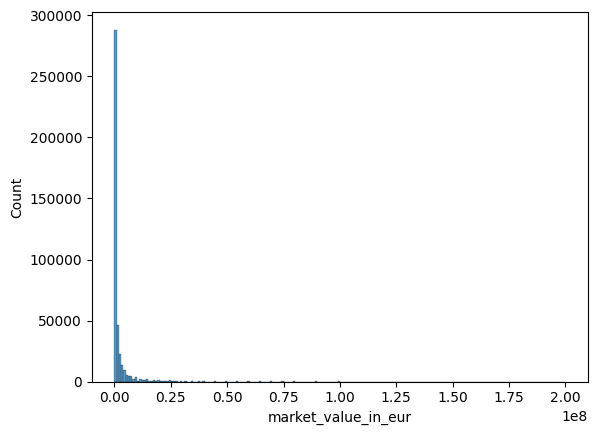

In [20]:
player_valuations.head()
sns.histplot(player_valuations['market_value_in_eur'], binwidth=1000000)
#sns.plt.ylim(0,100000)
#player_valuations.describe()

# What data we want

### from appearance.csv
  player_id -->  
  competition_id gives the "importance" coefficient of the performances.  
  Perfomances are: 
  yellow_cards
  red_cards
  goals
  assists
  minutes_played


### from club_games.csv
 nothing, for now 

### from clubs.csv
  total market value: summing the total market value of all the teams, we get the value of a competition

### from competitions.csv
  nothing

### from game_events.csv
  [goals], substitutions (just player out)

### from games.csv
  own_goals, opponent_goals, competition

### from player_valuations.csv
  date
  datetime
  dateweek
  player_id
  current_club_id
  market_value_in_eur
  player_club_domestic_competition_id

### from players.csv
  player_id
  current_club_id
  date_of_birth
  position
  sub_position
  foot
  height_in_cm
  market_value_in_eur
  highest_market_value_in_eur
  contract_expiration_date
  current_club_domestic_competition_id
  last_season




# The Plan

combine (with joins, filters, feature engineering, encoding....) all useful data in one dataset

# Steps

  - performances grouped by season taking into account the competition
  - QUESTION TO TAs: how to take into account perfomances and roles in a nonlinear combination (cartesian product of features (n_perf x 4) or 4 different datasets)
  - evaluate competition by taking the average market value of all clubs involved
  - convert date of birth in age (= today - date of birth, in days)
  - encodings: contract expiration date --> remaining available days(or weeks)
  - how do we take into account the subpostions? Feature: global position =  main position + alpha* subposition / (alpha + 1), where alpha is a hyper parmater dependent on the roles




# Little steps
  - compute total competition value for each competition each season summing clubs market value. Compute average dividing by the number of clubs
  - 

In [23]:
players.describe()
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28489 entries, 0 to 28488
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             28489 non-null  int64  
 1   name                                  28489 non-null  object 
 2   current_club_id                       28489 non-null  int64  
 3   current_club_name                     28489 non-null  object 
 4   country_of_citizenship                28488 non-null  object 
 5   country_of_birth                      26609 non-null  object 
 6   city_of_birth                         26621 non-null  object 
 7   date_of_birth                         28456 non-null  object 
 8   position                              28489 non-null  object 
 9   sub_position                          25049 non-null  object 
 10  foot                                  26304 non-null  object 
 11  height_in_cm   